In [1]:
import scanpy as sc

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib

import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

# utils function -- helper functions for plotting
import sys
sys.path.append('../../utils/')
import figure_utils as figure_utils

In [2]:
%matplotlib inline
matplotlib.rcParams['figure.dpi'] = 500 # 150 dpi resolution
matplotlib.rcParams['image.cmap'] = 'Spectral_r' # preferred color map
# matplotlib.rcParams['figure.figsize'] = [6, 6] # Square
# no bounding boxes or axis:
matplotlib.rcParams['axes.spines.bottom'] = "off"
matplotlib.rcParams['axes.spines.top'] = "off"
matplotlib.rcParams['axes.spines.left'] = "off"
matplotlib.rcParams['axes.spines.right'] = "off"

In [3]:
# UMAP PARAMS
DOT_SIZE = 25
LEGEND_FONTSIZE = 8
LEGEND_FONTOUTLINE = 1
UMAP_FIGSIZE = (10,10)

# SEXES COLOR
# HERM_COLOR = '#f58020'
# MALE_COLOR = '#1479b8'
# SHARED_SEX_COLOR = '#c2b69b'

# SEXES COLOR -- NEW
HERM_COLOR = '#ff8b00'
MALE_COLOR = '#2258a5'
SHARED_SEX_COLOR = '#349c55'

# SHEATH/SOCKET COLORS
# SHEATH_COLOR = '#a5444b'
# SOCKET_COLOR = '#bfbaba'

# DEAFULT teal brown
# SHEATH_COLOR = '#008080'
# SOCKET_COLOR = '#8B4513'

# lighter teal -- EQ
SHEATH_COLOR = '#3ac9c9' # '#369e9e'
SOCKET_COLOR = '#c47841'

# teal magenta

# lighter teal brown
# SHEATH_COLOR = '#00CED1'
# SOCKET_COLOR = '#D2691E'

# HEATMAP COLOR AESTHETICS
PLOTLY_COLOR_TEMPLATE = 'plotly_white'
HEATMAP_COLOR = [[0,'rgb(250,250,250)'], [1,'rgb(102,0,204)']]
HEATMAP_MIN_COLOR = 0
HEATMAP_MAX_COLOR = 4

In [4]:
adata = sc.read('../../data/WholeData.h5ad')
adata_glia = sc.read('../../data/GliaOnly.h5ad')

# SFig 5A -- <i>F20A1.1</i> Expression

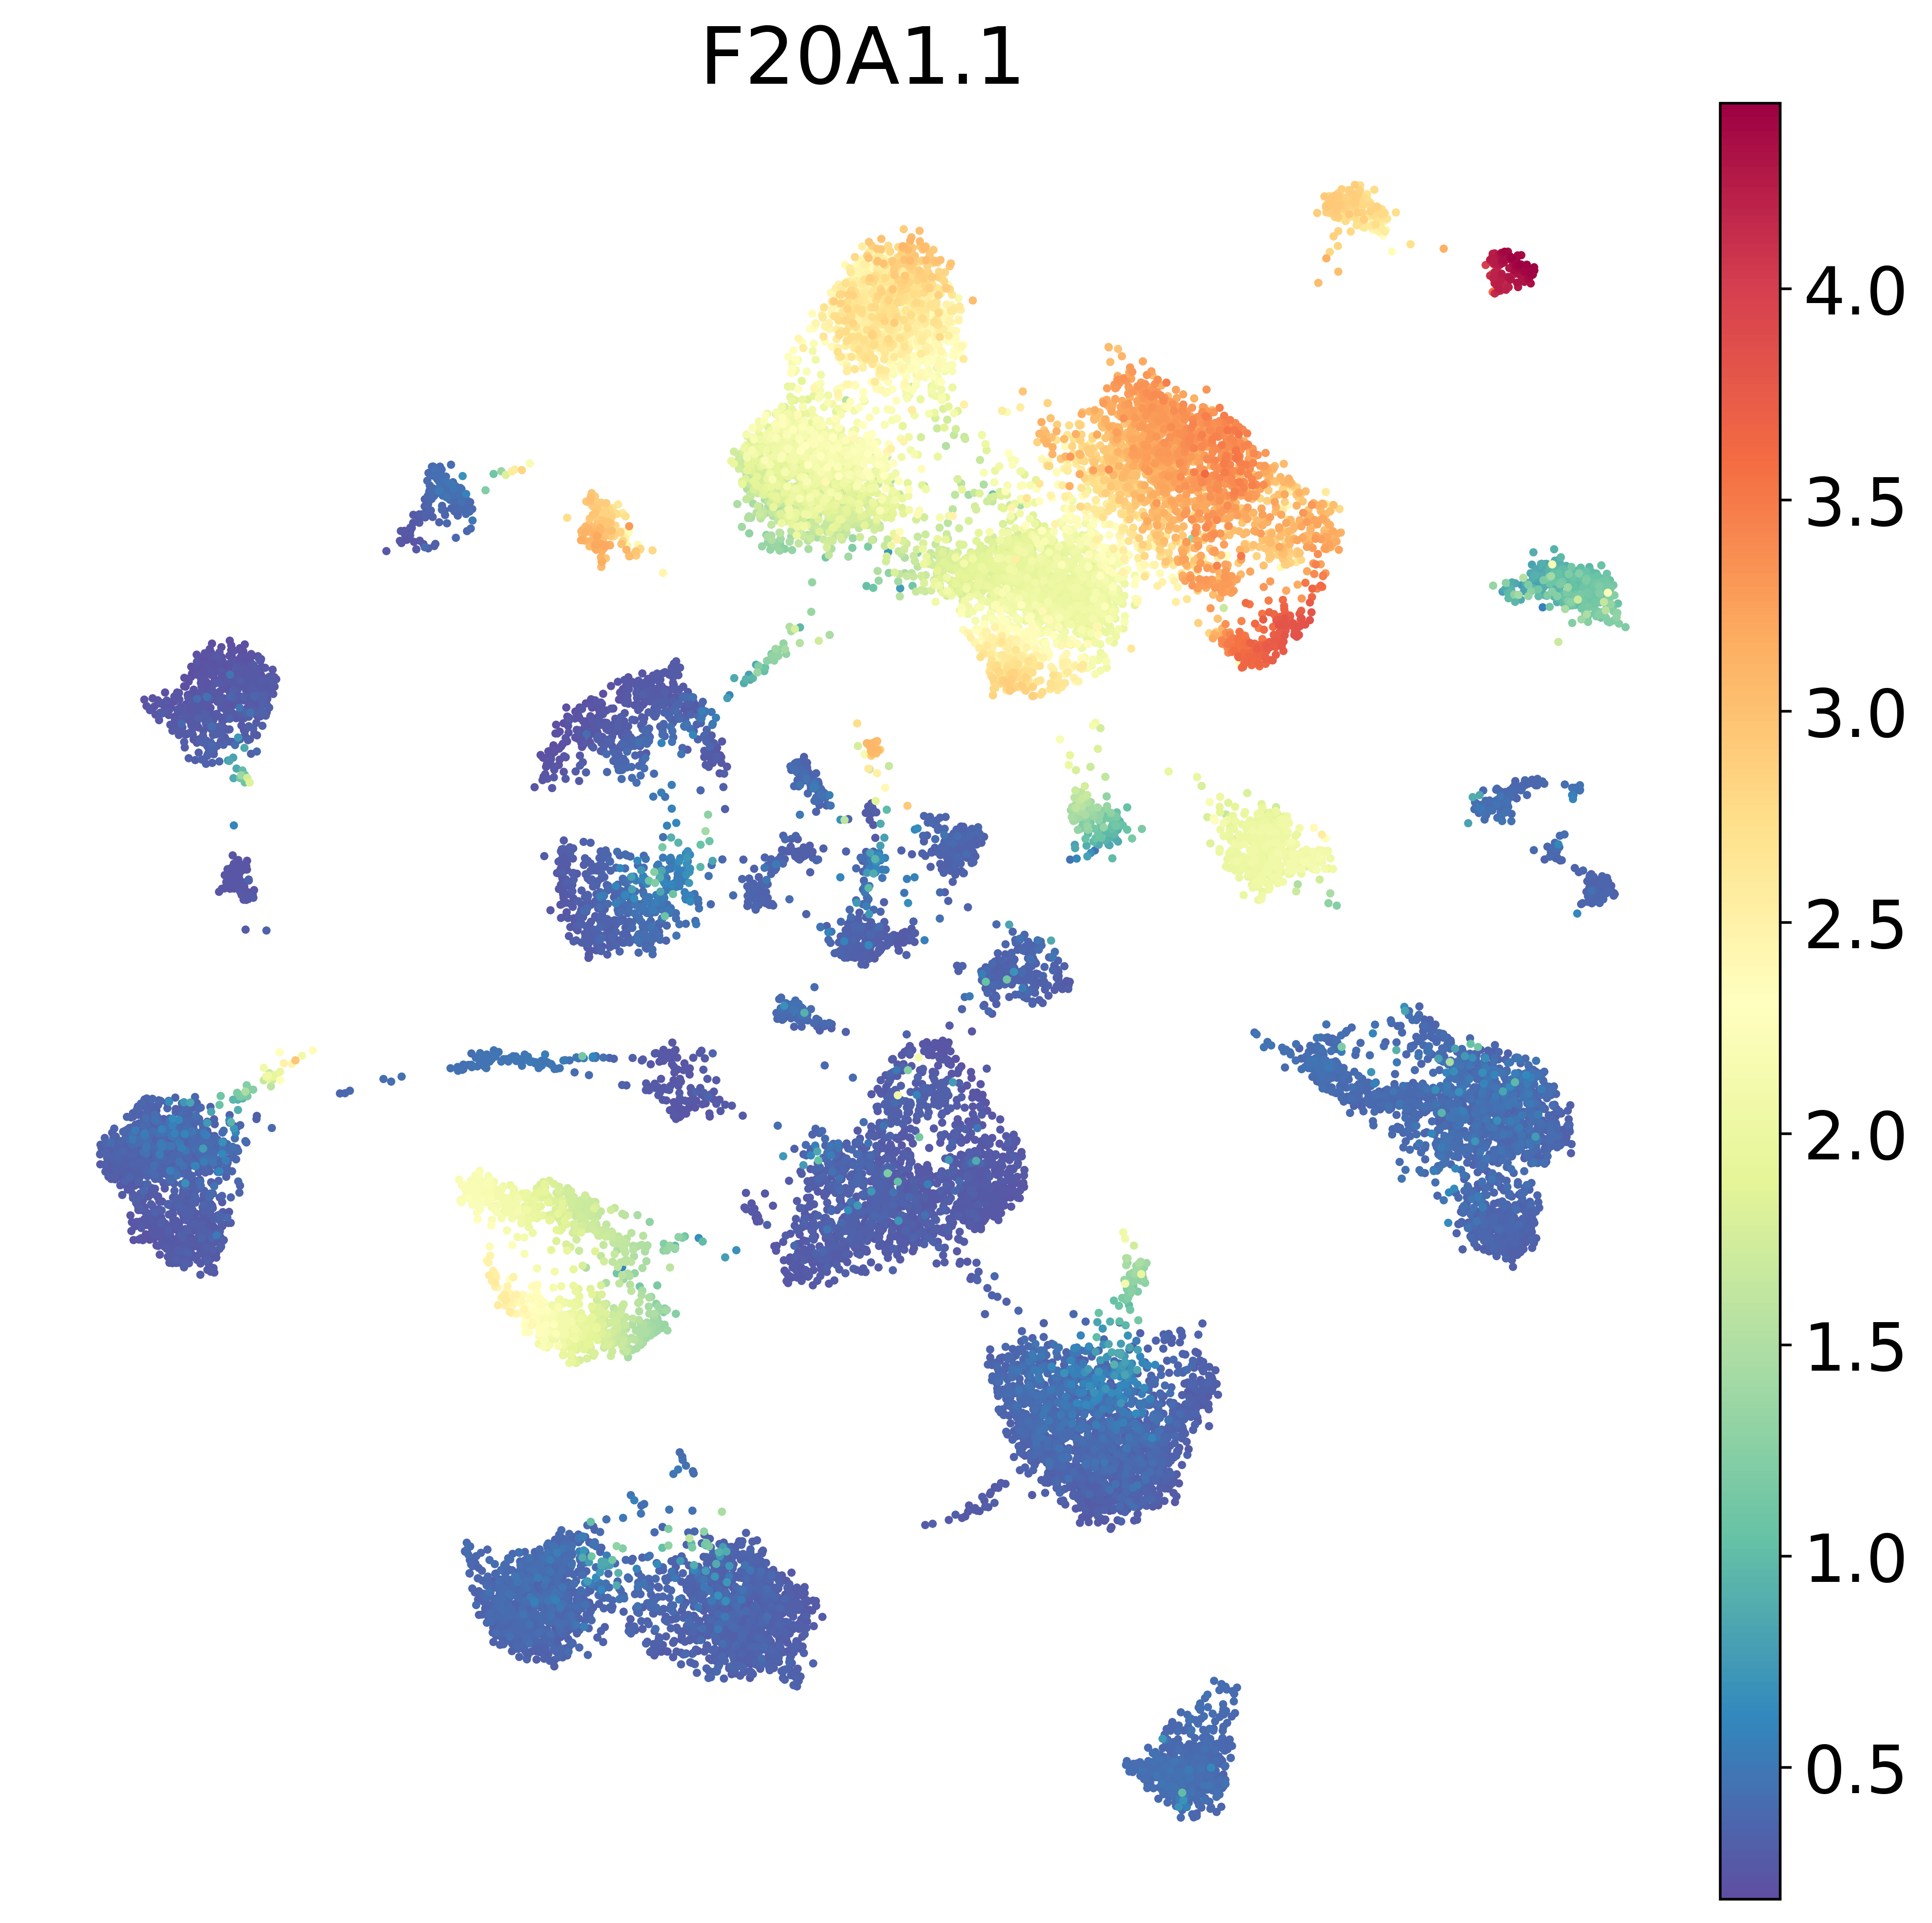

In [5]:
with matplotlib.pyplot.rc_context({'figure.figsize':UMAP_FIGSIZE, 'font.size': 20.0}):
    PLOT_GENES = ['F20A1.1'] 
    for gene in PLOT_GENES:
        sc.pl.umap(
            adata_glia,
            color=[gene],
            frameon=False,
            size=DOT_SIZE,
            save=f'figure_S5A_{gene}.png',
            layer='magic_imputed_postBC',
        )

# SFig 5E -- Heirarchical Clustering of Glia, Neurons & Non-neural cells

In [23]:
# # update the labels
# adata.obs.loc[:,'Cluster_Celltype'] = adata.obs.loc[:,'Cluster_Celltype'].str.replace('23 - skin-like glia','23 - Seam cells')
# adata.obs.loc[:,'Cluster_Celltype'] = adata.obs.loc[:,'Cluster_Celltype'].str.replace('23 - Posterior hyp','16 - Posterior hyp')

# adata.obs['Cluster_Celltype'] = adata.obs['Cluster_Celltype'].astype('category')

In [28]:
# sc.tl.dendrogram(adata, groupby='Cluster_Celltype', use_raw=False, use_rep='X_pca')
with matplotlib.pyplot.rc_context({'figure.figsize':(30,6),'font.size':20}):
    sc.pl.dendrogram(adata, groupby='Cluster_Celltype', save='S5E_HierarchicalClustering_WholeData.png')